In [1]:
import pandas as pd
import sys
import os
import json
from funciones import *

c:\Users\lande\anaconda3\envs\r10_lookiero\lib\site-packages\torch_geometric\__init__.py:4: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: Could not load this library: C:\Users\lande\anaconda3\envs\r10_lookiero\Lib\site-packages\torch_scatter\_version_cpu.pyd
  import torch_geometric.typing
c:\Users\lande\anaconda3\envs\r10_lookiero\lib\site-packages\torch_geometric\__init__.py:4: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: Could not load this library: C:\Users\lande\anaconda3\envs\r10_lookiero\Lib\site-packages\torch_cluster\_version_cpu.pyd
  import torch_geometric.typing
c:\Users\lande\anaconda3\envs\r10_lookiero\lib\site-packages\torch_geometric\__init__.py:4: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: Could not load this library: C:\Users\lande\anaconda3\envs\r10_lookiero\Lib\site-packages\torch_spline_conv\_version_cpu.py

In [2]:
df_product = cargar_csv_inteligente('product_2.csv')
df_variant = cargar_csv_inteligente('product_variant.csv')
df_color   = cargar_csv_inteligente('color.csv')
df_size    = cargar_csv_inteligente('size.csv')
df_brand   = cargar_csv_inteligente('brand.csv')
df_pfv     = cargar_csv_inteligente('product_feature_value.csv') 
df_fv      = cargar_csv_inteligente('feature_value.csv')         
df_fvf     = cargar_csv_inteligente('feature_value_family.csv')  
df_feat    = cargar_csv_inteligente('feature.csv')              

if 'id' in df_product.columns: df_product.rename(columns={'id': 'product_id'}, inplace=True)
if 'id' in df_variant.columns: df_variant.rename(columns={'id': 'variant_id'}, inplace=True)
if 'id' in df_color.columns: df_color.rename(columns={'id': 'color_id_ref', 'title': 'color_name'}, inplace=True)
if 'id' in df_size.columns:  df_size.rename(columns={'id': 'size_id_ref', 'title': 'size_name'}, inplace=True)
if 'id' in df_brand.columns: df_brand.rename(columns={'id': 'brand_id_ref', 'title': 'brand_name'}, inplace=True)
if 'id' in df_pfv.columns:   df_pfv.rename(columns={'id': 'pfv_id'}, inplace=True)
if 'id' in df_fv.columns:    df_fv.rename(columns={'id': 'fv_id_ref', 'value': 'feature_value_name'}, inplace=True)
if 'id' in df_feat.columns:  df_feat.rename(columns={'id': 'feat_id_ref', 'title': 'feature_name'}, inplace=True)
df_main = pd.merge(df_product, df_variant, on='product_id', how='left')
df_main['color_id'] = df_main['color_id'].astype(str).str.replace('.0', '', regex=False)
df_color['color_id_ref'] = df_color['color_id_ref'].astype(str)
df_main['size_id'] = df_main['size_id'].astype(str).str.replace('.0', '', regex=False)
df_size['size_id_ref'] = df_size['size_id_ref'].astype(str)
df_main = pd.merge(df_main, df_color, left_on='color_id', right_on='color_id_ref', how='left')
df_main = pd.merge(df_main, df_size, left_on='size_id', right_on='size_id_ref', how='left')
df_main = pd.merge(df_main, df_brand, left_on='brand_id', right_on='brand_id_ref', how='left')
df_feats = pd.merge(df_main, df_pfv, on='product_id', how='left')
df_feats = pd.merge(df_feats, df_fv, left_on='feature_value_id', right_on='fv_id_ref', how='left')
df_feats = pd.merge(df_feats, df_feat, left_on='feature_id', right_on='feat_id_ref', how='left')
df_final = pd.merge(df_feats, df_fvf, left_on='fv_id_ref', right_on='feature_value_id', how='left', suffixes=('', '_fam'))
cols_borrar = [c for c in df_final.columns if '_ref' in c or 'Unnamed' in c]
df_final.drop(columns=cols_borrar, inplace=True, errors='ignore')
print(f"DataFrame final 'df_final': {df_final.shape[0]} filas y {df_final.shape[1]} columnas.")
display(df_final.head(3))

Leemos: product_2.csv ... OK (2932 filas, 7 cols)
Leemos: product_variant.csv ... OK (65226 filas, 9 cols)
Leemos: color.csv ... OK (54 filas, 5 cols)
Leemos: size.csv ... OK (126 filas, 6 cols)
Leemos: brand.csv ... OK (163 filas, 4 cols)
Leemos: product_feature_value.csv ... OK (75347 filas, 3 cols)
Leemos: feature_value.csv ... OK (2266 filas, 3 cols)
Leemos: feature_value_family.csv ... OK (34633 filas, 2 cols)
Leemos: feature.csv ... OK (61 filas, 5 cols)
DataFrame final 'df_final': 14286029 filas y 36 columnas.


,product_id,brand_id,family_id,group,legacy_id_x,title,variant_id,barcode,color_id,legacy_id_y,season,size_id,stock,publishable,code,hexadecimal,name_x,parent,europe,lookiero,uk,order,visual_order,name_y,origin,number,pfv_id,feature_value_id,feature_value_name,feature_id,name,type,multiple,unit,family_id_fam,feature_value_id_fam
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,fbc2f719-e038-4243-892c-7bd2ca6e80b5,740661,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,a1b735a2-d6e2-4bc8-8502-ccab18802622,0,t,C2,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,BRAND119,MAINSTREAM,0,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d,top_type,STRING,f,\N,141f32d6-a5af-49bf-b019-fd28354977f1,b5ce1fed-4c38-4920-90b5-42e46f971e97
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,fbc2f719-e038-4243-892c-7bd2ca6e80b5,740661,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,a1b735a2-d6e2-4bc8-8502-ccab18802622,0,t,C2,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,BRAND119,MAINSTREAM,0,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d,top_type,STRING,f,\N,1b93b30c-833f-45a8-ba69-c21d2e7f4824,b5ce1fed-4c38-4920-90b5-42e46f971e97
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,fbc2f719-e038-4243-892c-7bd2ca6e80b5,740661,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,a1b735a2-d6e2-4bc8-8502-ccab18802622,0,t,C2,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,BRAND119,MAINSTREAM,0,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d,top_type,STRING,f,\N,3087da56-5a27-4e58-aea7-1555c640f232,b5ce1fed-4c38-4920-90b5-42e46f971e97


In [3]:
df_final

,product_id,brand_id,family_id,group,legacy_id_x,title,variant_id,barcode,color_id,legacy_id_y,season,size_id,stock,publishable,code,hexadecimal,name_x,parent,europe,lookiero,uk,order,visual_order,name_y,origin,number,pfv_id,feature_value_id,feature_value_name,feature_id,name,type,multiple,unit,family_id_fam,feature_value_id_fam
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,fbc2f719-e038-4243-892c-7bd2ca6e80b5,740661,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,a1b735a2-d6e2-4bc8-8502-ccab18802622,0,t,C2,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,BRAND119,MAINSTREAM,0,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d,top_type,STRING,f,\N,141f32d6-a5af-49bf-b019-fd28354977f1,b5ce1fed-4c38-4920-90b5-42e46f971e97
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,fbc2f719-e038-4243-892c-7bd2ca6e80b5,740661,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,a1b735a2-d6e2-4bc8-8502-ccab18802622,0,t,C2,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,BRAND119,MAINSTREAM,0,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d,top_type,STRING,f,\N,1b93b30c-833f-45a8-ba69-c21d2e7f4824,b5ce1fed-4c38-4920-90b5-42e46f971e97
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,fbc2f719-e038-4243-892c-7bd2ca6e80b5,740661,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,a1b735a2-d6e2-4bc8-8502-ccab18802622,0,t,C2,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,BRAND119,MAINSTREAM,0,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d,top_type,STRING,f,\N,3087da56-5a27-4e58-aea7-1555c640f232,b5ce1fed-4c38-4920-90b5-42e46f971e97
3,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,fbc2f719-e038-4243-892c-7bd2ca6e80b5,740661,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,a1b735a2-d6e2-4bc8-8502-ccab18802622,0,t,C2,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,BRAND119,MAINSTREAM,0,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d,top_type,STRING,f,\N,39792668-5cfd-42c2-8872-ad776e9bad70,b5ce1fed-4c38-4920-90b5-42e46f971e97
4,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,fbc2f719-e038-4243-892c-7bd2ca6e80b5,740661,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,a1b735a2-d6e2-4bc8-8502-ccab18802622,0,t,C2,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,BRAND119,MAINSTREAM,0,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d,top_type,STRING,f,\N,95f835a3-03fe-40f1-a813-4fbfd2842845,b5ce1fed-4c38-4920-90b5-42e46f971e97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14286024,98c51c8b-c467-4025-9517-806334bc8680,60f81be4-bc2d-465c-ad62-52551b7c9ad8,6598b655-3e19-448c-8b4f-ff6a29447b34,M300,\N,Sculp Jeans skinny,6ddc0805-de84-4949-927b-4089a71e81fe,811385,b67d3a44-549f-4cf9-baab-a3b1090b0103,70701,7,77df8

In [4]:
df_final["tipo_prenda"] = df_final["title"].apply(
    lambda x: x.split()[1].lower() if len(x.split()) >= 2 else None)
dfffinal = df_final[['product_id','title','season','name_x','lookiero','name_y','feature_value_name','name','tipo_prenda']]
dfffinal = dfffinal.drop_duplicates()
dfffinal['lookiero'] = dfffinal['lookiero'].apply(lambda x: json.loads(x.replace("'", "\""))['size'])
dfffinal = dfffinal.rename(columns={'product_id': 'ID','title': 'Titulo',
    'season': 'Temporada','name_x': 'Color','lookiero': 'Lookiero','name_y': 'Marca', 
    'feature_value_name': 'Caracteristica','name': 'Caracteristica1'})
df_final=df_final[df_final['tipo_prenda']!='l']
dfffinal["nivel"] = dfffinal["tipo_prenda"].apply(clasificar_prenda)
dffinal = dfffinal[dfffinal['Temporada'] == 9]

In [5]:
target_cols = ['Adventuruous', 'print', 'style', 'fit', 'application', 'Composition', 'alerts','sleeve_long_cm', 'long_cm','weather']
df_filtered = dffinal[dffinal['Caracteristica1'].isin(target_cols)].copy()
df_filtered = df_filtered.drop_duplicates(subset=['Titulo', 'Caracteristica1', 'Caracteristica'])
df_filtered['contador'] = df_filtered.groupby(['Titulo', 'Caracteristica1']).cumcount() + 1
df_filtered['nueva_columna'] = df_filtered['Caracteristica1'] + df_filtered['contador'].astype(str)
df_pivot = df_filtered.pivot(index='Titulo', columns='nueva_columna', values='Caracteristica')
df_final = df_pivot.fillna('').reset_index()
df_final = df_final.reindex(sorted(df_final.columns), axis=1)
df_final

nueva_columna,Titulo,alerts1,alerts2,alerts3,alerts4,application1,application2,application3,fit1,fit2,long_cm1,long_cm2,print1,print2,print3,sleeve_long_cm1,sleeve_long_cm2,style1,style2,style3,weather1,weather2,weather3
0,Abbey Sweater embroidered,,,,,work,freetime,,straight,,56,,smooth,,,57,,classic,,,cold_season,cold,
1,Acacia Top majolica,,,,,work,night,,straight,,61,,smooth,,,17,,night,boho,,warm,,
2,Acom Jacket port,,,,,freetime,,,straight,,58,,smooth,,,62,,classic,casual,,cold_season,,
3,Adette Shirt broadway,breastfeeding,tall_clients,,,freetime,,,loose,,71,,sheets,,,17,,boho,casual,,warm,warm_season,
4,Agathe Skirt mila,comfort,,,,freetime,work,,loose,,75,,floral,,,,,boho,street,,warm_season,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,Zebry Top closet,,,,,work,freetime,,straight,,68,,animal_print,,,20,,boho,classic,,warm,,
956,Zela Skirt kompag,comfort,,,,freetime,,,straight,,80,,smooth,,,,,boho,,,warm_season,cold_season,
957,Zeze Shirt woven,,,,,work,freetime,,straight,,69,,smooth,,,16,,boho,,,warm,,
958,Zeze Short woven,comfort,,,,work,freetime,,straight,,47,,smooth,,,,,casual,classic,,warm,,


In [6]:
target_cols = ['Adventuruous', 'print', 'style', 'fit', 'application', 'Composition', 'alerts','sleeve_long_cm', 'long_cm','weather']
df_filtered = dffinal[dffinal['Caracteristica1'].isin(target_cols)].copy()
df_filtered = df_filtered.drop_duplicates(subset=['Titulo', 'Caracteristica1', 'Caracteristica'])
df_filtered['contador'] = df_filtered.groupby(['Titulo', 'Caracteristica1']).cumcount() + 1
df_filtered['nueva_columna'] = df_filtered['Caracteristica1'] + df_filtered['contador'].astype(str)
df_pivot = df_filtered.pivot(index='Titulo', columns='nueva_columna', values='Caracteristica')
df_pivot = df_pivot.fillna('')
dffinal = dffinal.merge(df_pivot, on='Titulo', how='left')
new_cols = df_pivot.columns.tolist() 
dffinal[new_cols] = dffinal[new_cols].fillna('')
dffinal.to_csv('Datos/Transformados/df_unificado.csv',index=False)

In [7]:
dffinal = pd.read_csv('Datos/Transformados/df_unificado.csv')

C:\Users\lande\AppData\Local\Temp\ipykernel_36780\2032046956.py:1: DtypeWarning: Columns (11,12,13,16,18,22,23,28,31) have mixed types. Specify dtype option on import or set low_memory=False.
  dffinal = pd.read_csv('Datos/Transformados/df_unificado.csv')


In [8]:
dffinal

,ID,Titulo,Temporada,Color,Lookiero,Marca,Caracteristica,Caracteristica1,tipo_prenda,nivel,alerts1,alerts2,alerts3,alerts4,application1,application2,application3,fit1,fit2,long_cm1,long_cm2,print1,print2,print3,sleeve_long_cm1,sleeve_long_cm2,style1,style2,style3,weather1,weather2,weather3
0,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,yellow,M,BRAND119,sweaters,top_type,sweater,2,NaN,NaN,NaN,NaN,work,freetime,NaN,loose,NaN,58.0,NaN,smooth,NaN,NaN,58.0,NaN,classic,boho,NaN,warm_season,NaN,NaN
1,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,yellow,M,BRAND119,two,adventurous,sweater,2,NaN,NaN,NaN,NaN,work,freetime,NaN,loose,NaN,58.0,NaN,smooth,NaN,NaN,58.0,NaN,classic,boho,NaN,warm_season,NaN,NaN
2,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,yellow,M,BRAND119,without_closing,closing,sweater,2,NaN,NaN,NaN,NaN,work,freetime,NaN,loose,NaN,58.0,NaN,smooth,NaN,NaN,58.0,NaN,classic,boho,NaN,warm_season,NaN,NaN
3,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,yellow,M,BRAND119,warm_season,weather,sweater,2,NaN,NaN,NaN,NaN,work,freetime,NaN,loose,NaN,58.0,NaN,smooth,NaN,NaN,58.0,NaN,classic,boho,NaN,warm_season,NaN,NaN
4,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,yellow,M,BRAND119,closed_round_neckline,neckline,sweater,2,NaN,NaN,NaN,NaN,work,freetime,NaN,loose,NaN,58.0,NaN,smooth,NaN,NaN,58.0,NaN,classic,boho,NaN,warm_season,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198598,22efc184-5ecb-401d-8dea-9569ceae492d,Jara Short pant,9,purple,L,BRAND15,38,waist_contour,short,1,NaN,NaN,NaN,NaN,freetime,NaN,NaN,straight,NaN,38.0,NaN,floral,NaN,NaN,NaN,NaN,boho,classic,NaN,warm,NaN,NaN
198599,22efc184-5ecb-401d-8dea-9569ceae492d,Jara Short pant,9,purple,L,BRAND15,38,long_cm,short,1,NaN,NaN,NaN,NaN,freetime,NaN,NaN,straight,NaN,38.0,NaN,floral,NaN,NaN,NaN,NaN,boho,classic,NaN,warm,NaN,NaN
198600,22efc184-5ecb-401d-8dea-9569ceae492d,Jara Short pant,9,purple,L,BRAND15,true,rubber_waist,short,1,NaN,NaN,NaN,NaN,freetime,NaN,NaN,straight,NaN,38.0,NaN,floral,NaN,NaN,NaN,NaN,boho,classic,NaN,warm,NaN,NaN
198601,22efc184-5ecb-401d-8dea-9569ceae492d,Jara Short pant,9,purple,L,BRAND15,true,gripper,short,1,NaN,NaN,NaN,NaN,freetime,NaN,NaN,straight,NaN,38.0,NaN,floral,NaN,NaN,NaN,NaN,boho,classic,NaN,warm,NaN,NaN


In [9]:
mapa_prendas = {
    "pant": "pantalones","jeans": "pantalones","jean": "pantalones","short": "pantalones","shorts": "pantalones",

    "skirt": "falda","falda": "falda",

    "dress": "vestido","jumpsuit": "mono","playsuit": "mono_corto",

    "cardigan": "jersey","sweater": "jersey","shirt": "camiseta","tshirt": "camiseta",
    "t-shirt": "camiseta","t-shit": "camiseta","top": "camiseta","sweatshirt": "jersey",
    "pullover": "jersey",

    "jacket": "chaqueta","jakect": "chaqueta",  "jackect": "chaqueta","scarf": "bufanda",
    "foulard": "bufanda","fular": "bufanda","parka": "chaqueta","coat": "chaqueta",
    "bag": "bolso","trench": "chaqueta"}
dffinal["tipo_prenda2"] = dffinal["tipo_prenda"].str.lower().replace(mapa_prendas)
mapa_tiempo = {'warm_season':'warm','warm':'warm','cold_season':'cold','cold':'cold'}
dffinal["weather"] = dffinal["weather1"].str.lower().replace(mapa_tiempo)
dffinal = dffinal.drop(['weather1', 'weather2', 'weather3'], axis=1)
mapa_tallas = {'XS':1,'S':2,'M':3,'L':4,'XL':5,'XXL':6,'XXXL':7,'X4XL':8,'UNQ':100}
dffinal["Salto_talla"] = dffinal["Lookiero"].replace(mapa_tallas)

C:\Users\lande\AppData\Local\Temp\ipykernel_36780\1960257886.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dffinal["Salto_talla"] = dffinal["Lookiero"].replace(mapa_tallas)


In [10]:
cols_manuales = [
    'ID', 'nivel', 'Lookiero', 'tipo_prenda2', 
    'Temporada', 'Titulo', 'Color', 
    'Caracteristica', 'Caracteristica1', 'style1', 'application1',
    'print1', 'long_cm1', 'fit1', 'weather'
]

df_reducido = dffinal[cols_manuales] 
df_reducido.to_csv('Datos/Transformados/df_limpio.csv', index=False)
df_reducido.to_csv('Web/static/df_limpio.csv', index=False)

In [11]:
dffinal['Color'].unique()

array(['yellow', 'ecru', 'blue_dark', 'black', 'gray_light', 'khaki',
       'brown', 'indigo', 'white', 'green', 'mustand', 'red', 'crimson',
       'blue_light', 'green_dark', 'pink', 'beige', 'grey_blue',
       'blue_petrol', 'blue', 'brown_light', 'camel', 'strawberry',
       'fuchsia', 'pale_pink', 'grey', 'rust', 'yellow_light', 'coral',
       'blue_turquoise', 'green_light', 'taupe', 'garnet', 'lilac',
       'brick', 'lemon', 'ochre', 'grey_dark', 'orange', 'sand', 'salmon',
       'mint', 'blue_klein', 'purple', 'nude', 'baby_blue', 'silver',
       'gold', 'jade', 'mandarine', 'aubergine', 'wine', 'pistachio'],
      dtype=object)

In [12]:
color_hex = {
    'black':'#000000','beige':'#F5F5DC','rust':'#B7410E','red':'#FF0000','yellow':'#FFFF00',
    'ecru':'#C2B280','blue_dark':'#00008B','green_dark':'#006400','camel':'#C19A6B',
    'gray_light':'#D3D3D3','khaki':'#C3B091','brown':'#8B4513','indigo':'#4B0082',
    'white':'#FFFFFF','green':'#008000','grey_dark':'#505050','mustand':'#E1AD01',
    'pink':'#FFC0CB','blue_light':'#ADD8E6','blue':'#0000FF','orange':'#FFA500',
    'crimson':'#DC143C','salmon':'#FA8072','green_light':'#90EE90','garnet':'#733635',
    'grey_blue':'#6699CC','aubergine':'#580F41','blue_petrol':'#006C84','grey':'#808080',
    'brown_light':'#A0522D','strawberry':'#FC5A8D','fuchsia':'#FF00FF','pale_pink':'#FADADD',
    'taupe':'#483C32','yellow_light':'#FFFFE0','coral':'#FF7F50','lilac':'#C8A2C8',
    'blue_turquoise':'#30D5C8','nude':'#E3BC9A','blue_klein':'#002FA7','silver':'#C0C0C0',
    'brick':'#8B0000','purple':'#800080','lemon':'#FFF44F','ochre':'#CC7722',
    'sand':'#C2B280','mint':'#98FF98','jade':'#00A86B','gold':'#FFD700',
    'pistachio':'#93C572','baby_blue':'#89CFF0','mandarine':'#FF8C42','wine':'#722F37'
}


In [13]:
import colorsys
import matplotlib.colors as mcolors

def hue(hex_color):
    r, g, b = mcolors.to_rgb(hex_color)
    h, _, _ = colorsys.rgb_to_hsv(r, g, b)
    return h

ordenados = dict(sorted(color_hex.items(), key=lambda x: hue(x[1])))

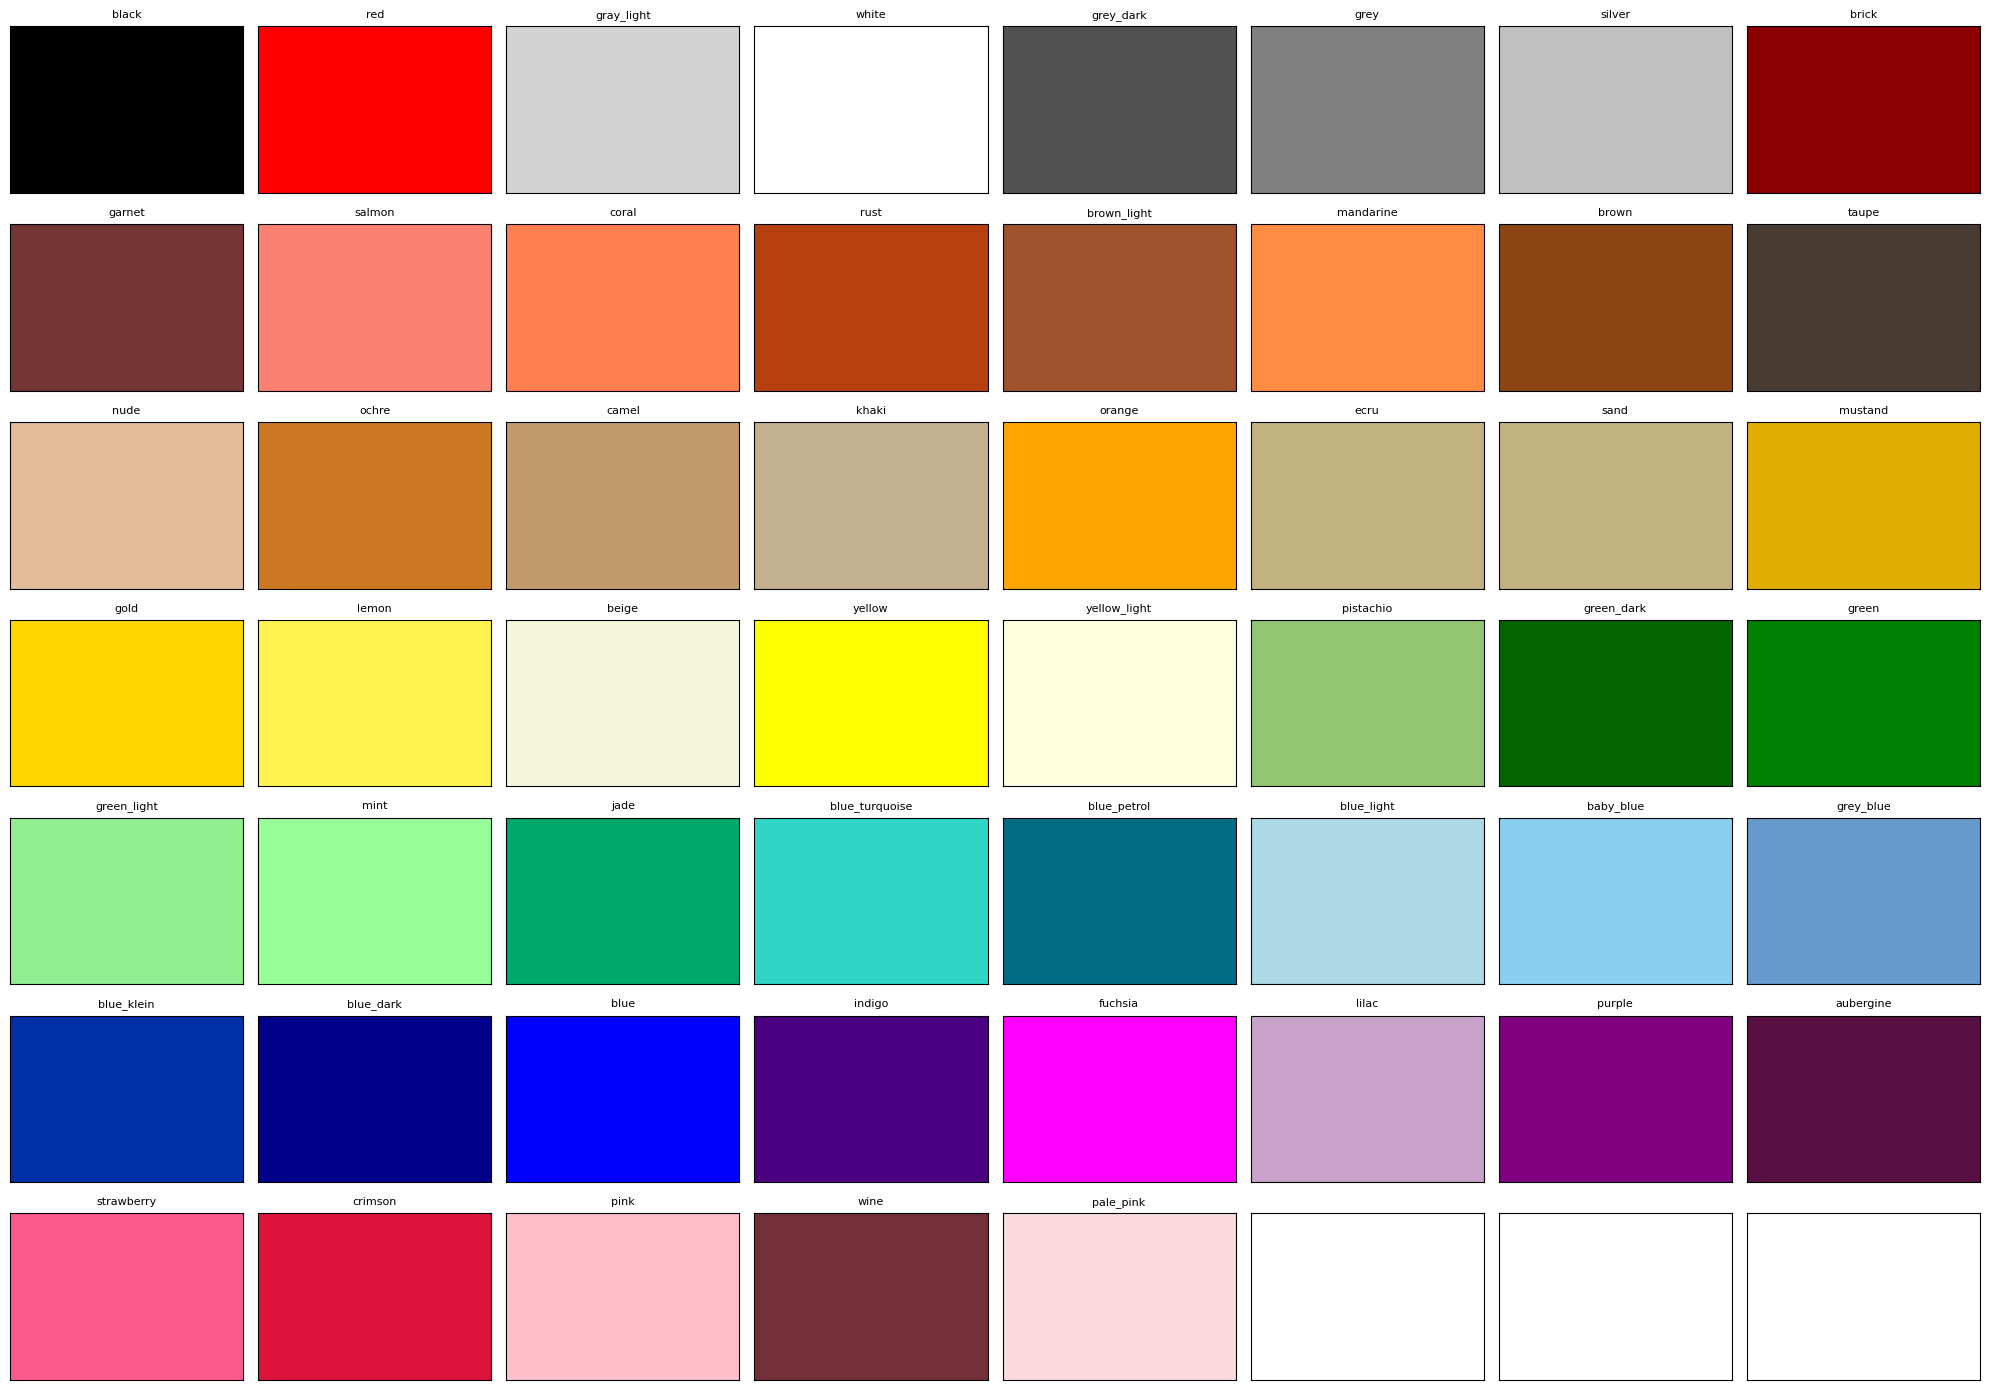

In [14]:
import matplotlib.pyplot as plt
import math

colors = list(ordenados.keys())
hex_values = list(ordenados.values())

n = len(colors)
cols = 8
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows*2))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < n:
        ax.set_facecolor(hex_values[i])
        ax.set_title(colors[i], fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

# 1Rojo (Red2,brick0,pale_pink6,creamson1,pink5,strawberry4)
# 2Rojo naranjado (coral3,salmon4)
# 3Naranja (ochre1,orange3,rust0,brown0,brown light0,mandarine2,taupe0)
# 4aMARILLO NARANJA (camel1,mustand0,beige6,nude5)
# 5AMARILLO (gold3,lemon4,yellow4,yellow-light6,kakhi0,ecru1,sand1)
# 6AMARILLO VERDOSo()
# 7VERDE (pistacho4,verde oscuro0,green1,green-light5,meant5,jade2)
# 8AZUL VERDOSO (blue_turquise5,blue-petrol1,blue-light6)
# 9AZUL (baby-blue6,grey_blue5,blue_klein3,blue4)
# 10AZUL VIOLETA (blue_dark0)
# 11VIOLETA (indigo3,purple2)
# 12ROJO VIOLETA (fucsia4,lilac6,aubergine0,wine1,garmet1)
# 0BLANCO
# 0NEGRO
# 0GRISES (Gray_light,grey_dark,grey,silver)

In [15]:
mapa_colores = {
    'red': 12, 'brick': 10, 'pale_pink': 16, 'crimson': 11, 'pink': 15, 'strawberry': 14,
    'coral': 23, 'salmon': 24,
    'ochre': 31, 'orange': 33, 'rust': 30, 'brown': 30, 'brown_light': 30, 'mandarine': 32, 'taupe': 30,
    'camel': 41, 'mustand': 40, 'beige': 46, 'nude': 45,
    'gold': 53, 'lemon': 54, 'yellow': 54, 'yellow_light': 56, 'khaki': 50, 'ecru': 51, 'sand': 51,
    'pistachio': 74, 'green_dark': 70, 'green': 71, 'green_light': 75, 'mint': 75, 'jade': 72,
    'blue_turquoise': 85, 'blue_petrol': 81, 'blue_light': 86,
    'baby_blue': 96, 'grey_blue': 95, 'blue_klein': 93, 'blue': 94,
    'blue_dark': 100,
    'indigo': 113, 'purple': 112,
    'fuchsia': 124, 'lilac': 126, 'aubergine': 120, 'wine': 121, 'garnet': 121,
    'gray_light': 2, 'grey_dark': 2, 'grey': 2, 'silver': 2,'black': 0, 'white': 4}
dffinal['color_nivel'] = dffinal['Color'].map(mapa_colores)
dffinal['color_nivel'] = dffinal['color_nivel'].fillna(0).astype(int)

In [16]:
dffinal.to_csv('Datos/Transformados/df_unificado_colores.csv',index=False)